<img src="idal-logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">Master en Ciencia de Datos</h1></font>
<font color="#6E6E6E"><h2 align="left">Tarea Evaluable Python. </h2></font> 
<font color="#6E6E6E"><h2 align="left">15-10-2021</h2></font> 

#### Jorge Vila Tomás

**Ejercicio 1. (3 puntos)** El Análisis de Componentes Principales (PCA) es una técnica de extracción de características ampliamente utilizada en ciencia de datos. Consiste en obtener un espacio vectorial con las direcciones de máxima varianza de los datos sin transformar.

El procedimiento para calcular una PCA consiste en los siguientes pasos:

* Se parte de una tabla de datos $X$ en los que en cada una de las $N$ filas es una muestra y cada una de las $M$ columnas  una característica.
* Se calcula la matriz de covarianza $\Sigma=\frac{1}{N}(X^T·X)$, siendo $N$ el número de muestras de $X$.
* Se diagonaliza la matriz de cavarianza, obteniendo los autovalores (eigenvalues $\lambda_1...\lambda_M$)  y los autovectores (eigenvectors $\overrightarrow{v_1}...\overrightarrow{v_M}$).
* Los autovalores ordenados de mayor a menor, constituyen la varianza explicada por cada componente principal, y los vectores asociados a cada autovalor ordenados por orden de autovalor y dispuestos en columnas constiutyen la matriz $P$ de cambio de base.
* Las muestras en el espacio transformado se pueden obtener a partir de la siguiente expresión matricial $X_{PCA}=(P^T·X^T)^T$. 

Implementa las siguientes tareas:

1. Estandariza el conjunto de datos ``Boston`` de la librería sckit learn (si no está en tu environment instalala!). La carga del data set está hecha en el notebook. Almacena el resultado en Xstd. (0.5 punto)
2. Calcula la matriz de covarianza $\Sigma$ a partir de la definición. (0.5 puntos)
3. Empleando la función ``np.linalg.eig`` de numpy obten los autovalores y los autovectores de la matriz de covarianza. (0.5 puntos)
4. Ordena (de mayor a menor valor de autovalor) la matriz de autovectores para obtener la matriz de cambio de base $P$. (0.5 puntos)
5. Calcula la varianza acumulada explicada por cada componente principal, para ello debes de ordenar de mayor a menor los autovalores obtenidos con ``np.linalg.eig``, obtener la suma acumulada (``np.cumsum``) de ese vector y dividir por el máximo. (0.5 puntos)
6. Obtén la matriz de muestras en el espacio transformado $X_{PCA}$  a partir de la definición. (0.5 puntos)

In [1]:
import numpy as np
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
print(X.shape)

#Ejercicio 2.1 Normalización
## Aprovechando los métodos .mean() y .std() podemos calcular los parámetros
## por columna de forma sencilla especificando axis=0.
data_mean = X.mean(axis=0)
data_std = X.std(axis=0)
Xstd = (X - data_mean)/data_std

#Ejercicio 2.2 Covarianza
## Hay muchas formas de calcular el producto matricial: matmul, dot y @.
## Elegimos esta última por limpieza de código.
cov_mat = (1/len(Xstd))*(Xstd.T @ Xstd)

#Ejercicio 2.3 Diagonalización
eig_val, eig_vec = np.linalg.eig(cov_mat)

#Ejercicio 2.4 Obtención de P
# Ordenamos los autovectores de mayor a menor autovalor
## argsort nos devuelve los índices que ordenan el array de menor a mayor
sort_idx = np.argsort(eig_val)
## flip nos permite voltear un array, así que lo utilizamos
## para dejarlo ordenado de mayor a menor.
sort_idx = np.flip(sort_idx)
## Finalmente indexamos los arrays originales con los nuevos índices para ordenarlos
eig_val_sort = eig_val[sort_idx]
eig_vec_sort = eig_vec[sort_idx,:]
P = eig_vec_sort.copy()

#Ejercicio 2.5 Varianza explicada
#Ordenamos los autovalores para comprobar el porcentaje de varianza explicada por cada PC
eig_val_cum = np.cumsum(eig_val_sort)
eig_val_cum_norm = eig_val_cum / eig_val_cum.max()



#Ejercicio 2.6 Xpca
#Obtenemos muestras en el espacio transformado
Xpca = (P.T @ X.T).T




(506, 13)


**Ejercicio 2. (2 puntos)** Crea una función llamada ``PCA_MCD(X,normaliza)`` con dos arguentos de entrada, un array ``X`` bidimensional de datos para hacer PCA y un booleano ``normaliza`` que si toma el valor ``True`` estandarizará las columnas de X. El valor por defecto de ``Normaliza`` será ``True``. La función debe devolver un array unidimensional con la varianza explicada acumulada.

In [2]:
def PCA_MCD(X, normaliza=True):
    ## Hacemos unas comprobaciones iniciales para aseguraros de que X es un array
    ## bidimensional y que normaliza es un booleano.
    if not isinstance(X, np.ndarray):
        print(f"X tiene que ser un array pero es de tipo {type(X)}.")
        return
    elif len(X.shape) < 2:
        print(f"X tiene que ser un array bidimensional pero solo tiene una dimensión.")
        return
    if not isinstance(normaliza, bool):
        print(f"normaliza tiene que ser un array pero es de tipo {type(normaliza)}.")
        return
    
    ## Comprobamos si es necesario normalizar los datos o no.
    if normaliza:
        data_mean = X.mean(axis=0)
        data_std = X.std(axis=0)
        X = (X - data_mean)/data_std
    
    ## Calculamos la matriz de covarianza.
    cov_mat = (1/len(X))*(X.T @ X)

    ## Diagonalizamos la matriz de covarianza.
    eig_val, eig_vec = np.linalg.eig(cov_mat)

    ## Ordenamos los autovalores de mayor a menor.
    sort_idx = np.argsort(eig_val)
    sort_idx = np.flip(sort_idx)
    eig_val_sort = eig_val[sort_idx]

    ## Calculamos la varianza explicada acumulada y la normalizamos a 1.
    eig_val_cum = np.cumsum(eig_val_sort)
    ## Es equivalente dividir por la suma de los valores que dividir por el máximo
    ## de la suma acumulada.
    eig_val_cum_norm = eig_val_cum / eig_val_cum.max()

    return eig_val_cum_norm

In [3]:
## Podemos comprobar que obtenemos lo mismo que antes
test_pca = PCA_MCD(X, True) 
(test_pca == eig_val_cum_norm).all()

True

**Ejercicio 3. (1 punto)** Representa un gráfico de línea usando matplolib en el que se represente la varianza explicada acumulada calculada en el ejercicio 2 en función del número de componentes principales. El trazo debe ser discontinuo, de color negro y cada punto re representará con una estrella. ¿Cómo varia los resultados estandarizando y sin estandarizar?

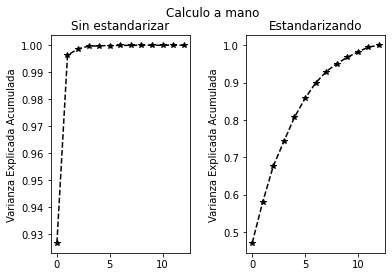

In [4]:
import matplotlib.pyplot as plt

var_no_norm = PCA_MCD(X, normaliza=False)
var_norm = PCA_MCD(X, normaliza=True)

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(var_no_norm, '--k*')
axes[0].set_title("Sin estandarizar")
axes[0].set_ylabel("Varianza Explicada Acumulada")

axes[1].plot(var_norm, '--k*')
axes[1].set_title("Estandarizando")
axes[1].set_ylabel("Varianza Explicada Acumulada")

fig.subplots_adjust(wspace=0.4)
plt.suptitle("Calculo a mano")

plt.show()

Podemos aprovechar la implementación de `sklearn` para comprobar si hemos obtenido el resultado correcto:

In [5]:
from sklearn.decomposition import PCA

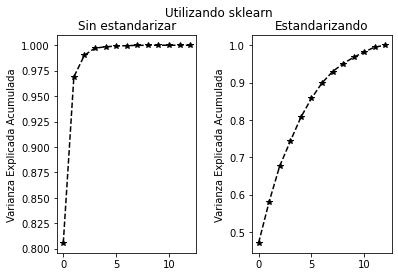

In [6]:
pca = PCA()
pca.fit(X)
pca_std = PCA()
pca_std.fit(Xstd)

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(np.cumsum(pca.explained_variance_ratio_),'--k*')
axes[0].set_title("Sin estandarizar")
axes[0].set_ylabel("Varianza Explicada Acumulada")

axes[1].plot(np.cumsum(pca_std.explained_variance_ratio_),'--k*')
axes[1].set_title("Estandarizando")
axes[1].set_ylabel("Varianza Explicada Acumulada")

fig.subplots_adjust(wspace=0.4)
plt.suptitle("Utilizando sklearn")

plt.show()

Se puede ver que el resultado es prácticamente igual excepto una pequeña diferencia numérica en el caso sin estandarizar. Esto se debe a que en `sklearn` centran las variables automáticamente, por eso en el caso estandarizado no se ve diferencia, porque ya están centradas.

**Ejercicio 4. (1 puntos)** Crea una array 8x3 con los enteros entre 20 y 43 de uno en uno. Después crea 4 nuevos arrays 2x3 partiendo el array original de dos en dos filas. 

In [7]:
A = np.arange(start=20, stop=44, step=1).reshape((8,3))
print(f"A {A.shape}:\n",A)
A_1 = A[0:2,:]
A_2 = A[2:4,:]
A_3 = A[4:6,:]
A_4 = A[6:8,:]
print(f"A_1 {A_1.shape}:\n",A_1)
print(f"A_2 {A_2.shape}:\n",A_2)
print(f"A_3 {A_3.shape}:\n",A_3)
print(f"A_4 {A_4.shape}:\n",A_4)

A (8, 3):
 [[20 21 22]
 [23 24 25]
 [26 27 28]
 [29 30 31]
 [32 33 34]
 [35 36 37]
 [38 39 40]
 [41 42 43]]
A_1 (2, 3):
 [[20 21 22]
 [23 24 25]]
A_2 (2, 3):
 [[26 27 28]
 [29 30 31]]
A_3 (2, 3):
 [[32 33 34]
 [35 36 37]]
A_4 (2, 3):
 [[38 39 40]
 [41 42 43]]


**Ejercicio 5. (1.5 puntos)** Carga el dataset `Coches_dataset_jgx_I.csv` empleando la librería `pandas` y sus funciones de importación.

* Una vez cargado, visualiza las 5 primeras muestras del data frame.
* Averigua el número de muestras del data frame.
* Averigua el número de variables.
* Crea una diccionario cuyas claves contengan las posición de la columna y el valor los nombres de las variables del dataframe.


In [8]:
import pandas as pd

In [9]:
## Para cargarlo correctamente tenemos que específicar que el separador es ;
df = pd.read_csv("Coches_dataset_jgx_I.csv", sep=";")
print("El DataFrame tiene {} filas y {} columnas.".format(*df.shape))
## El método .head(n) permite ver las n primeras filas.
df.head(5)

El DataFrame tiene 61 filas y 10 columnas.


,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450


In [10]:
# Número de muestras (podemos obtenerlo de formas distintas)
n_muestras = len(df)
n_muestras_2 = df.shape[0]
n_muestras, n_muestras_2

(61, 61)

In [11]:
# Número de variables
n_variables = df.shape[1]
n_variables

10

In [12]:
# Diccionario posición_columnas:nombres_columnas
pos_nombre = {i:nombre for i,nombre in enumerate(df.columns)}
pos_nombre

{0: 'index',
 1: 'company',
 2: 'body-style',
 3: 'wheel-base',
 4: 'length',
 5: 'engine-type',
 6: 'num-of-cylinders',
 7: 'horsepower',
 8: 'average-mileage',
 9: 'price'}

**Ejercicio 6. (1.5 puntos)** Limpieza de un dataframe.

* En el data frame existen datos ausentes codificados con símbolos `"?"` y `"n.a"`, reemplaza estos valores por `NaN`. Puedes tirar de sentencias de control, pero si eres hábil puedes utilizar una opción del  método `read_csv` para que en la carga del fichero se lleve a cabo lo que te pido. Almacena el resultado un data frame denominado `df_clean`.

* Elimina la columna `index` del dataframe.
* Elimina aquellas muestras que contengan algún NaN.
* Almacena el data frame `df_clean` en el fichero  `Coches_dataset_jgx_I_clean.csv`empleando como delimitador de datos `;` y sin almacenar el índice de la muestra.

In [13]:
## La forma más sencilla de hacerlo es volver a cargar el dataframe utilizando el parámetro
## na_values para específicar que "?" y "n.a" también tienen que ser considerados NAs
df_clean = pd.read_csv("Coches_dataset_jgx_I.csv", sep=";", na_values=["?", "n.a"])
print(f"df tiene {df.isna().sum().sum()} valores nulos y df_clean tiene {df_clean.isna().sum().sum()}.")

df tiene 3 valores nulos y df_clean tiene 9.


In [14]:
# Elimina la columna index del dataframe
## Lo podemos hacer utilizando drop o pop, pero drop es más cómodo
## Lo hacemos inplace para no tener que sobreescribir la variable.
df_clean.drop(labels="index", axis=1, inplace=True)
df_clean.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [15]:
# Elimina los NaNs
## Es muy sencillo de realizar si utilizamos el método .dropna()
df_clean.dropna(inplace=True)
print(f"Comprobamos que tenemos {df_clean.isna().sum().sum()} NaNs después de la limpieza.")

Comprobamos que tenemos 0 NaNs después de la limpieza.


In [16]:
# Almacenamos df_clean en un archivo csv con separador ; y sin índice
df_clean.to_csv('Coches_dataset_jgx_I_clean.csv', sep=";", index=False)

**Ejercicio extra Seaborn. (1 puntos)** 

* Carga el fichero `Coches_dataset_jgx_I_clean.csv` obtenido en el último apartado del ejercicio anterior.
* Representa un diagrama de barras en el que en el `eje x` se visualice cada una de las marcas de los coches y en el `eje y` el precio medio de esa marca.
* Representa, en la misma figura, dos histogramas correspondientes a la variable precio. Cada histograma mostrará la distribución de precios correspondientes a los coches de más de 130 caballos y de menos de 130 caballos. Los histogramas deberán contener 9 bins y el estilo de ambos será diferente para poder observar ambas distribuciones.

In [17]:
df_clean_cargado = pd.read_csv("Coches_dataset_jgx_I_clean.csv", sep=";")
df_clean_cargado.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [18]:
import seaborn as sns

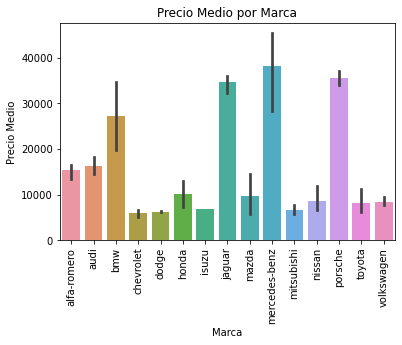

In [19]:
## Seaborn calcula la media por defecto, pero si quisiesemos calcular otra cosa
## tendríamos que especificarlo en el parámetro estimator
plt.figure()
sns.barplot(data=df_clean_cargado, x="company", y="price")
plt.title("Precio Medio por Marca")
plt.xticks(rotation=90)
plt.xlabel("Marca")
plt.ylabel("Precio Medio")
plt.show()

A la hora de representar variables filtradas en el momento, la sintaxis de `Seaborn` se vuelve un poco más liosa y se acerca más a `Matplotlib` como podemos ver:

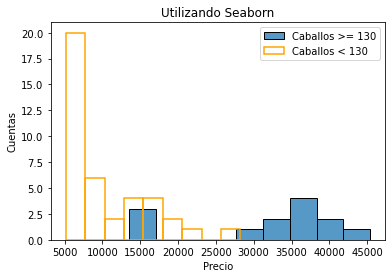

In [20]:
plt.figure()
sns.histplot(data=df_clean_cargado[df_clean_cargado.horsepower>=130], x="price", bins=9)
sns.histplot(data=df_clean_cargado[df_clean_cargado.horsepower<130], x="price", bins=9, fill=False, color='orange')
plt.title("Utilizando Seaborn")
plt.xlabel("Precio")
plt.ylabel("Cuentas")
plt.legend(["Caballos >= 130", "Caballos < 130"])
plt.show()

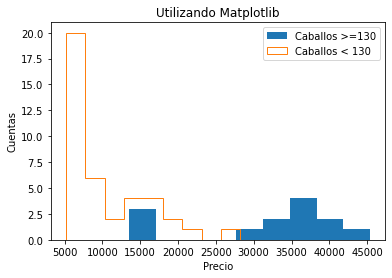

In [21]:
plt.figure()
plt.hist(df_clean_cargado[df_clean_cargado.horsepower>=130].price, bins=9, label="Caballos >=130")
plt.hist(df_clean_cargado[df_clean_cargado.horsepower<130].price, bins=9, histtype='step', label="Caballos < 130")
plt.title("Utilizando Matplotlib")
plt.xlabel("Precio")
plt.ylabel("Cuentas")
plt.legend()
plt.show()

Aún así, podemos seguir aprovechando las ventajas de `Seaborn` si nos creamos una nueva columna que nos sirva de filtro y utilizamos el parámetro `hue` de `histplot()` para filtrar los datos:

In [22]:
df_clean_cargado["hp130"] = df_clean_cargado.horsepower>=130
df_clean_cargado.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price,hp130
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0,False
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0,False
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0,True
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0,False
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0,False


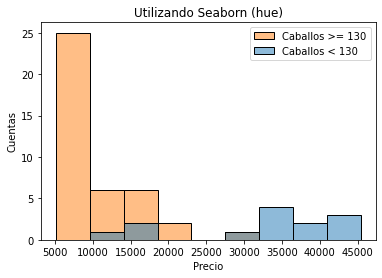

In [23]:
plt.figure()
sns.histplot(data=df_clean_cargado, x="price", bins=9, hue='hp130', hue_order=[True, False])
plt.title("Utilizando Seaborn (hue)")
plt.xlabel("Precio")
plt.ylabel("Cuentas")
plt.legend(["Caballos >= 130", "Caballos < 130"])
plt.show()

Es importante darse cuenta de que en este último caso, los bines de los dos plots son compartidos, mientras que en los plots anteriores, como hacíamos un histograma por cada plot, los bines no eran los mismos exactamente.